## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [13]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('motorbike_ambulance_calls.csv')

In [6]:
def get_data(data_path: str):
    data = pd.read_csv(data_path)
    velue_max = data.max()
    velue_min = data.min()
    statistical = data.describe()
    shape  = data.shape
    
    print("Statistical:\n", statistical) 
    print("\nMax:\n", velue_max)
    print("\nMin:\n", velue_min)
    print("\nDimensions of the dataset:\n", shape)
    
    return statistical, velue_max, velue_min, shape 

In [7]:
data = get_data(data_path='motorbike_ambulance_calls.csv')


Statistical:
             index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [48]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


In [47]:
print("\nNumber of data for each variable:\n")
data.info()


Number of data for each variable:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [11]:
missing_values = data.isnull().sum()

missing_values_summary = missing_values[missing_values > 0]

if missing_values_summary.empty:
    result = "No missing values"
else:
    result = f"Missing values summary:\n{missing_values_summary}"

print(result)

No missing values


**Висновки з 1-3 завдання (детальні)**

1.   Числовий аналіз виявляє як розподілені основні показники: температуруа, вологість та швидкість вітру. Ці дані добре підходять для більш глибокого вивчення та передбачення.
2.   Типи даних включають int64, float64 та object. Це означає, що числа зберігаються як цілі числа та дроби правильно, але дати та пори року записані як текст, що може потребувати зміни для їх аналізу.
3. Ми можемо помітити, що відсутні порожні значення

**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [14]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  return df
  
data = tranform_date(data, 'date')


/var/folders/pk/_9jfkx9s3_93slg6pbvr54qr0000gn/T/ipykernel_78739/3414913291.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


In [15]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")
  
get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


#Аналіз категоріальних змінних

Як код виконався ми  можемо помітити, що дані охоплюють період з 1 січня 2011 року до 31 грудня 2012 року. Це допомагає зрозуміти, які дати містять набір даних, і стає можливо планувати аналіз у цьому часовому діапазоні.

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [16]:
data = pd.read_csv('motorbike_ambulance_calls.csv')
data_categorical = data[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']]

data_categorical



,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,spring,0,1,0,0,6,0,1
1,spring,0,1,1,0,6,0,1
2,spring,0,1,2,0,6,0,1
3,spring,0,1,3,0,6,0,1
4,spring,0,1,4,0,6,0,1
...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,0,1,1,2
17375,spring,1,12,20,0,1,1,2
17376,spring,1,12,21,0,1,1,1
17377,spring,1,12,22,0,1,1,1


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [21]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  season_mapping = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
  df[season_col_name] = df[season_col_name].map(season_mapping)
  
data = encode_season(data, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

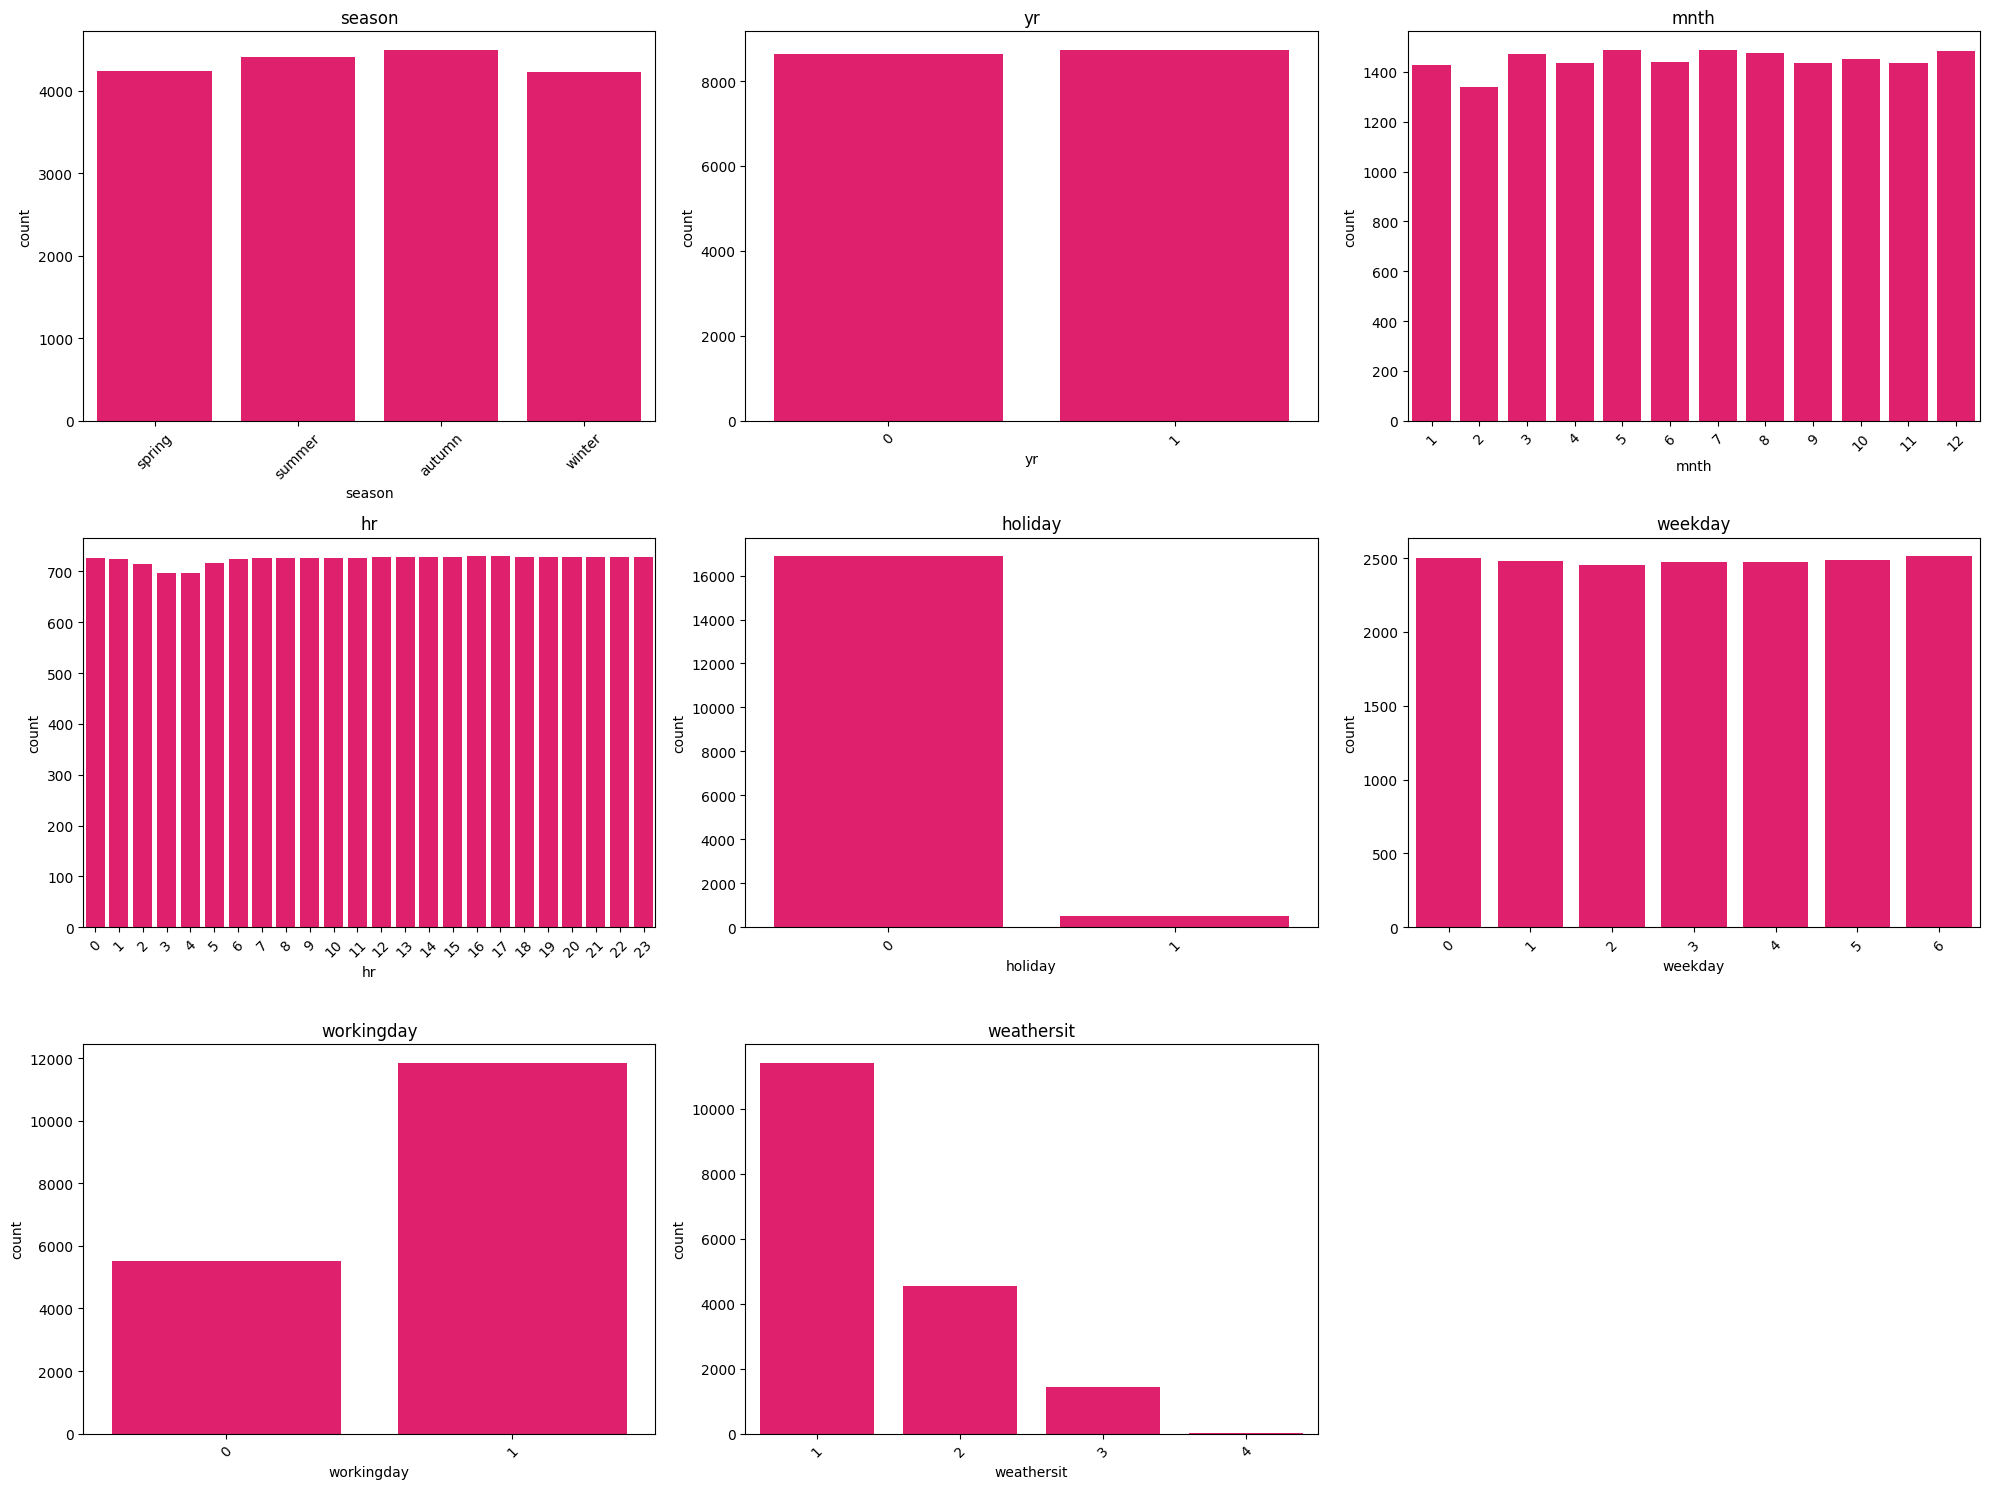

In [46]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))  
for variable, subplot in zip(data_categorical.columns, ax.flatten()[:len(data_categorical.columns)]):
    sns.countplot(x=variable, data=data_categorical, ax=subplot, color='#FF0065')
    subplot.set_title(variable)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
ax.flatten()[-1].set_visible(False)  

plt.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**

1.   Вибір категорійних змінних у окремий набір даних - це важливий етап у аналізі даних, тому що це дозволяє використовувати особливі методи для роботи та аналізу категорійних даних.
2.   Переведення сезону з категорій в числа допомагає комп'ютерним програмам з машинного навчання і статистики краще працювати з даними про сезони, що дозволяє їм легше знаходити патерни та зв'язки.
3. На графіках видно, що кількість викликів змінюється в залежності від часу доби, місяця та сезону. Також зазначено, що в деяких категоріях є великі відмінності, що може свідчити про вплив цих факторів на кількість викликів.

#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [18]:
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
data_numerical = data[numerical_columns]


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

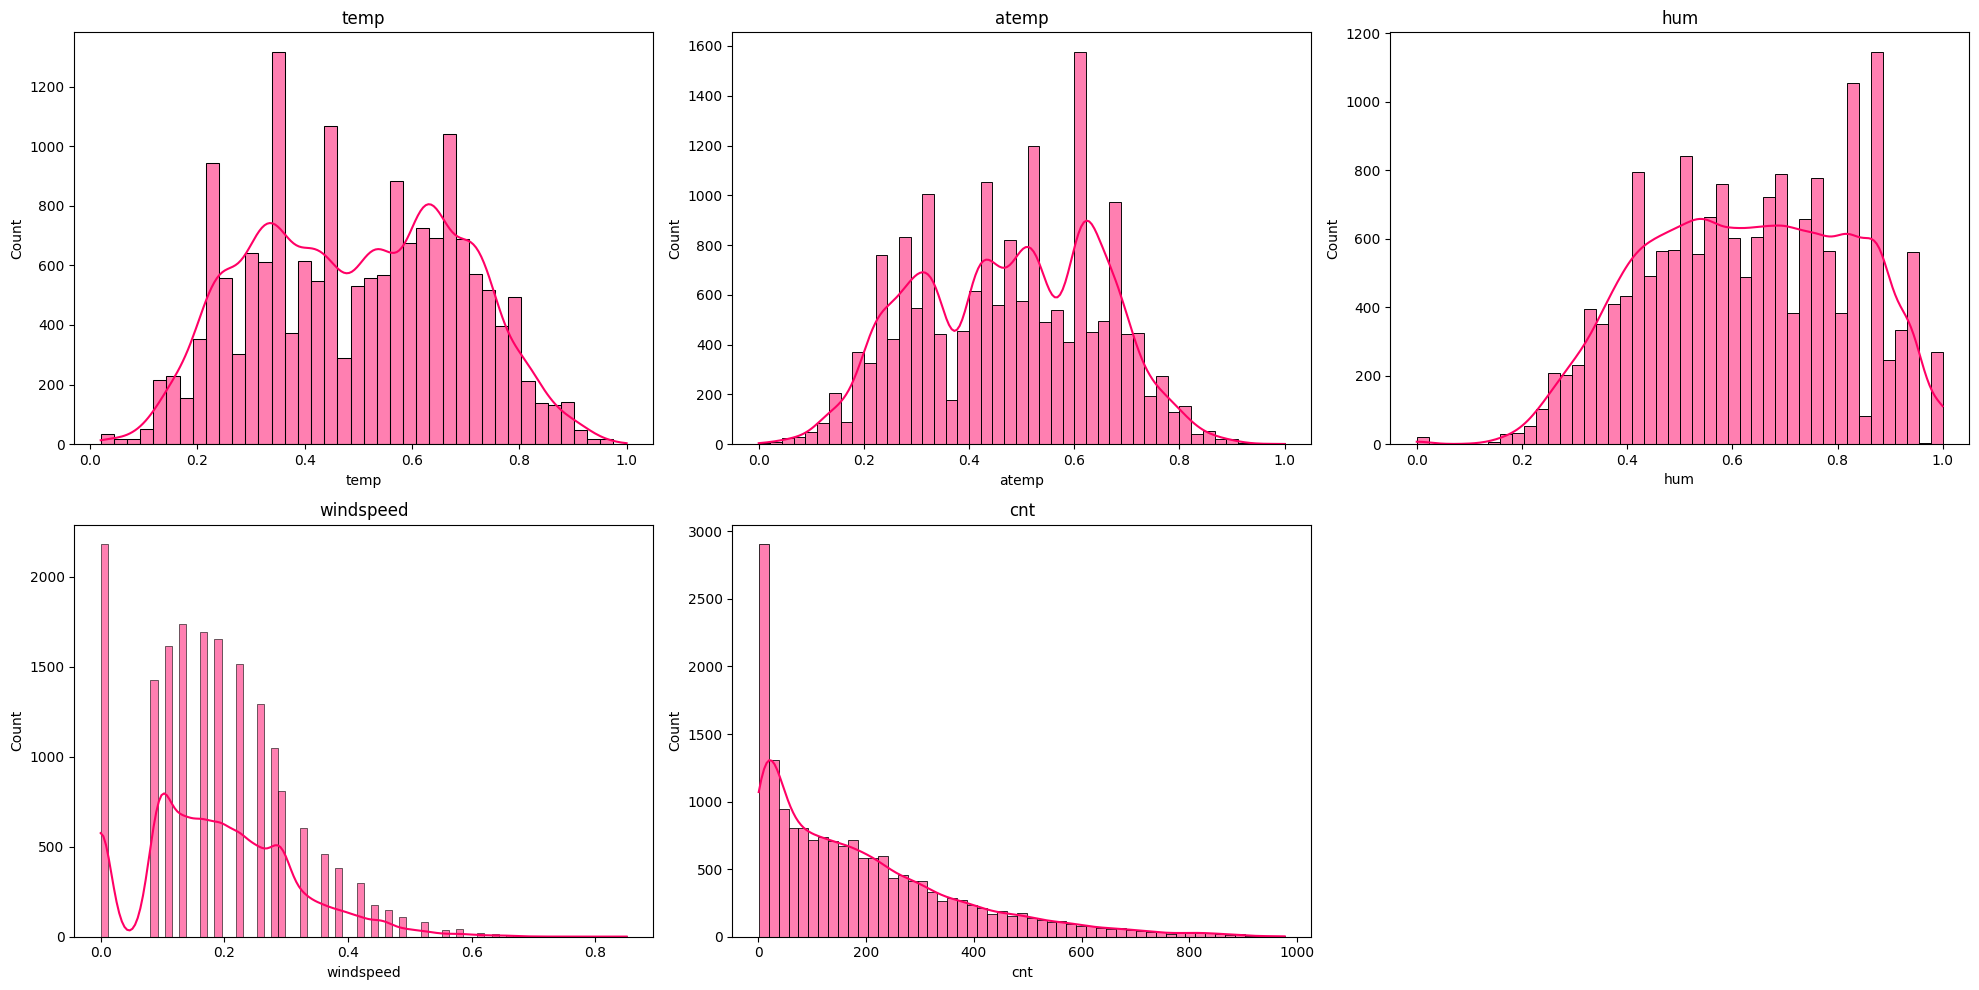

In [45]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10)) 

for var, subplot in zip(data_numerical.columns, ax.flatten()):
    sns.histplot(data_numerical[var], ax=subplot, kde=True, color='#FF0065')
    subplot.set_title(var)

plt.tight_layout()

ax[-1, -1].set_visible(False)

plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

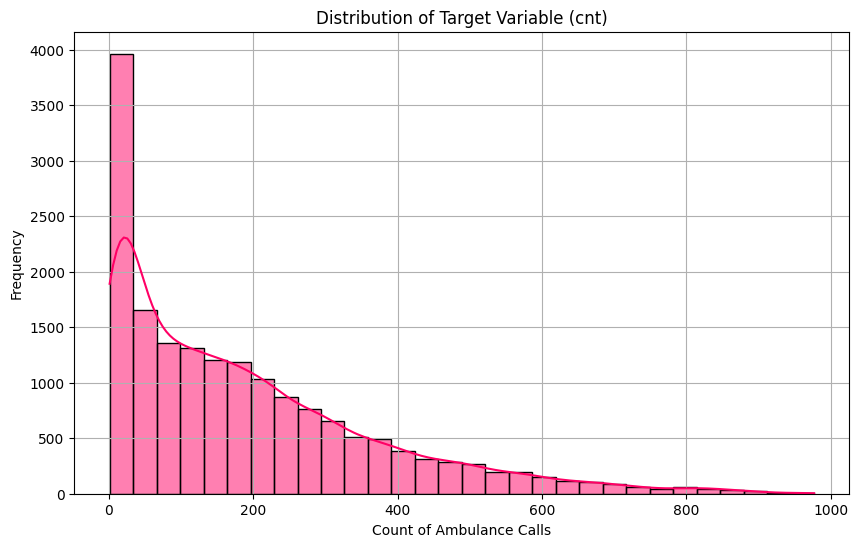

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], bins=30, kde=True, color='#FF0065')
plt.title('Distribution of Target Variable (cnt)')
plt.xlabel('Count of Ambulance Calls')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

skewness = data['cnt'].skew()


**Висновки з 8-10 завдання (детальні)**

1. Вибираючи тільки числа з усіх даних, ми робимо аналіз. Це допомагає зрозуміти зв'язки, знайти закономірності і створити добрі прогнози. Наприклад, такі числа як температура, відчуття температури, вологість і швидкість вітру важливі, бо вони впливають на кількість подій, які ми аналізуємо.
2.   Температура та відчутна дуже залежать одна від одної і впливають на кількість дзвінків. Вологість буває різною, але частіше все ж знаходиться на середньому рівні. Вітер зазвичай дме слабко або помірно. Кількість дзвінків різниться: є дні з дуже багатьма дзвінками, що може бути пов'язано з якимись особливими подіями або умовами.
3. Кількість викликів швидкої допомоги переважно зосереджена на деяких днях більше, ніж на інших, з коєфіцієнтом нахилу 1.28. Це означає, що є дні з дуже високою кількістю викликів, можливо, через певні події або умови. Розуміння цього допомагає краще планувати, як розподіляти ресурси швидкої допомоги.

#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

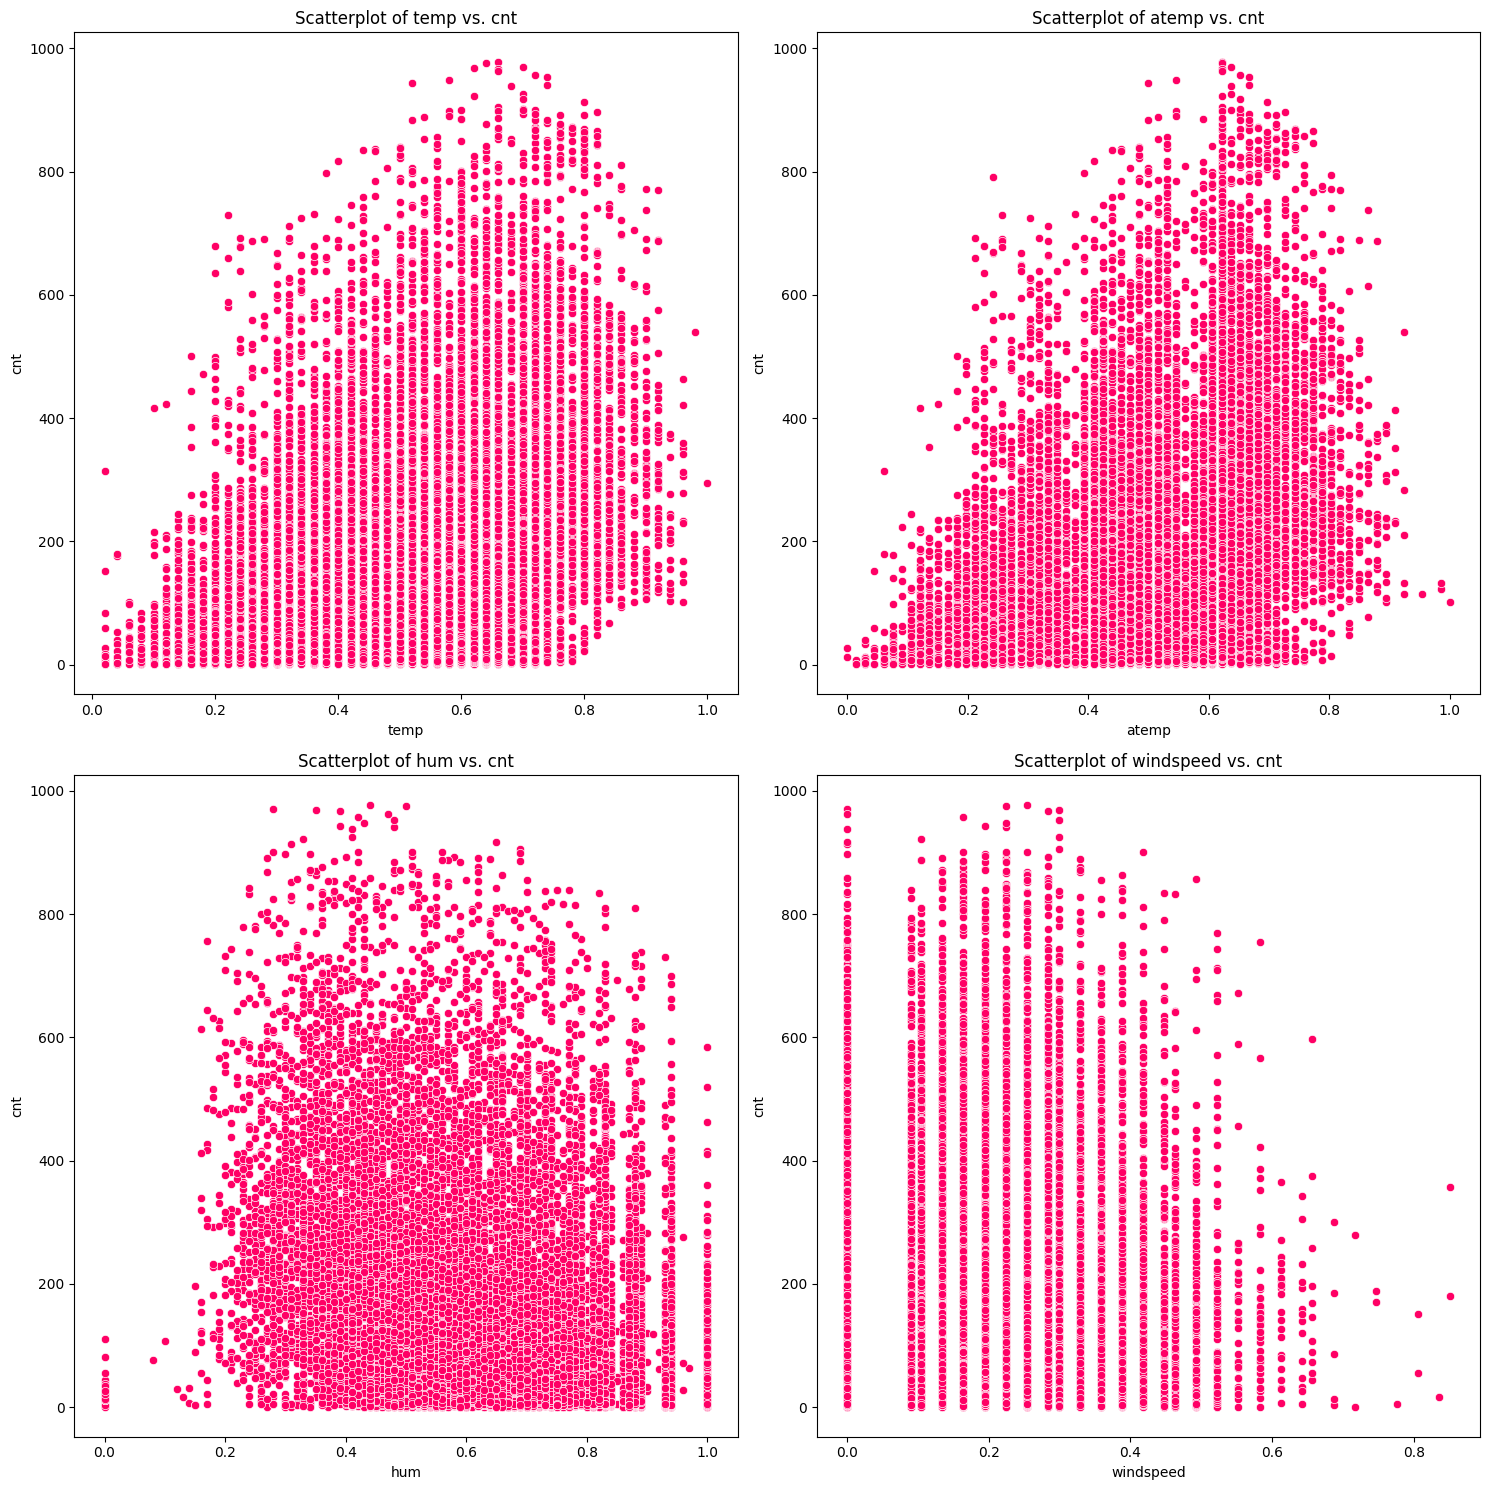

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))  # Adjusting the subplot grid to accommodate all variables

for var, subplot in zip(data_numerical.columns.drop('cnt'), ax.flatten()):
    sns.scatterplot(x=data_numerical[var], y=data_numerical['cnt'], ax=subplot, color='#FF0065')
    subplot.set_title(f'Scatterplot of {var} vs. cnt')
    subplot.set_xlabel(var)
    subplot.set_ylabel('cnt')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

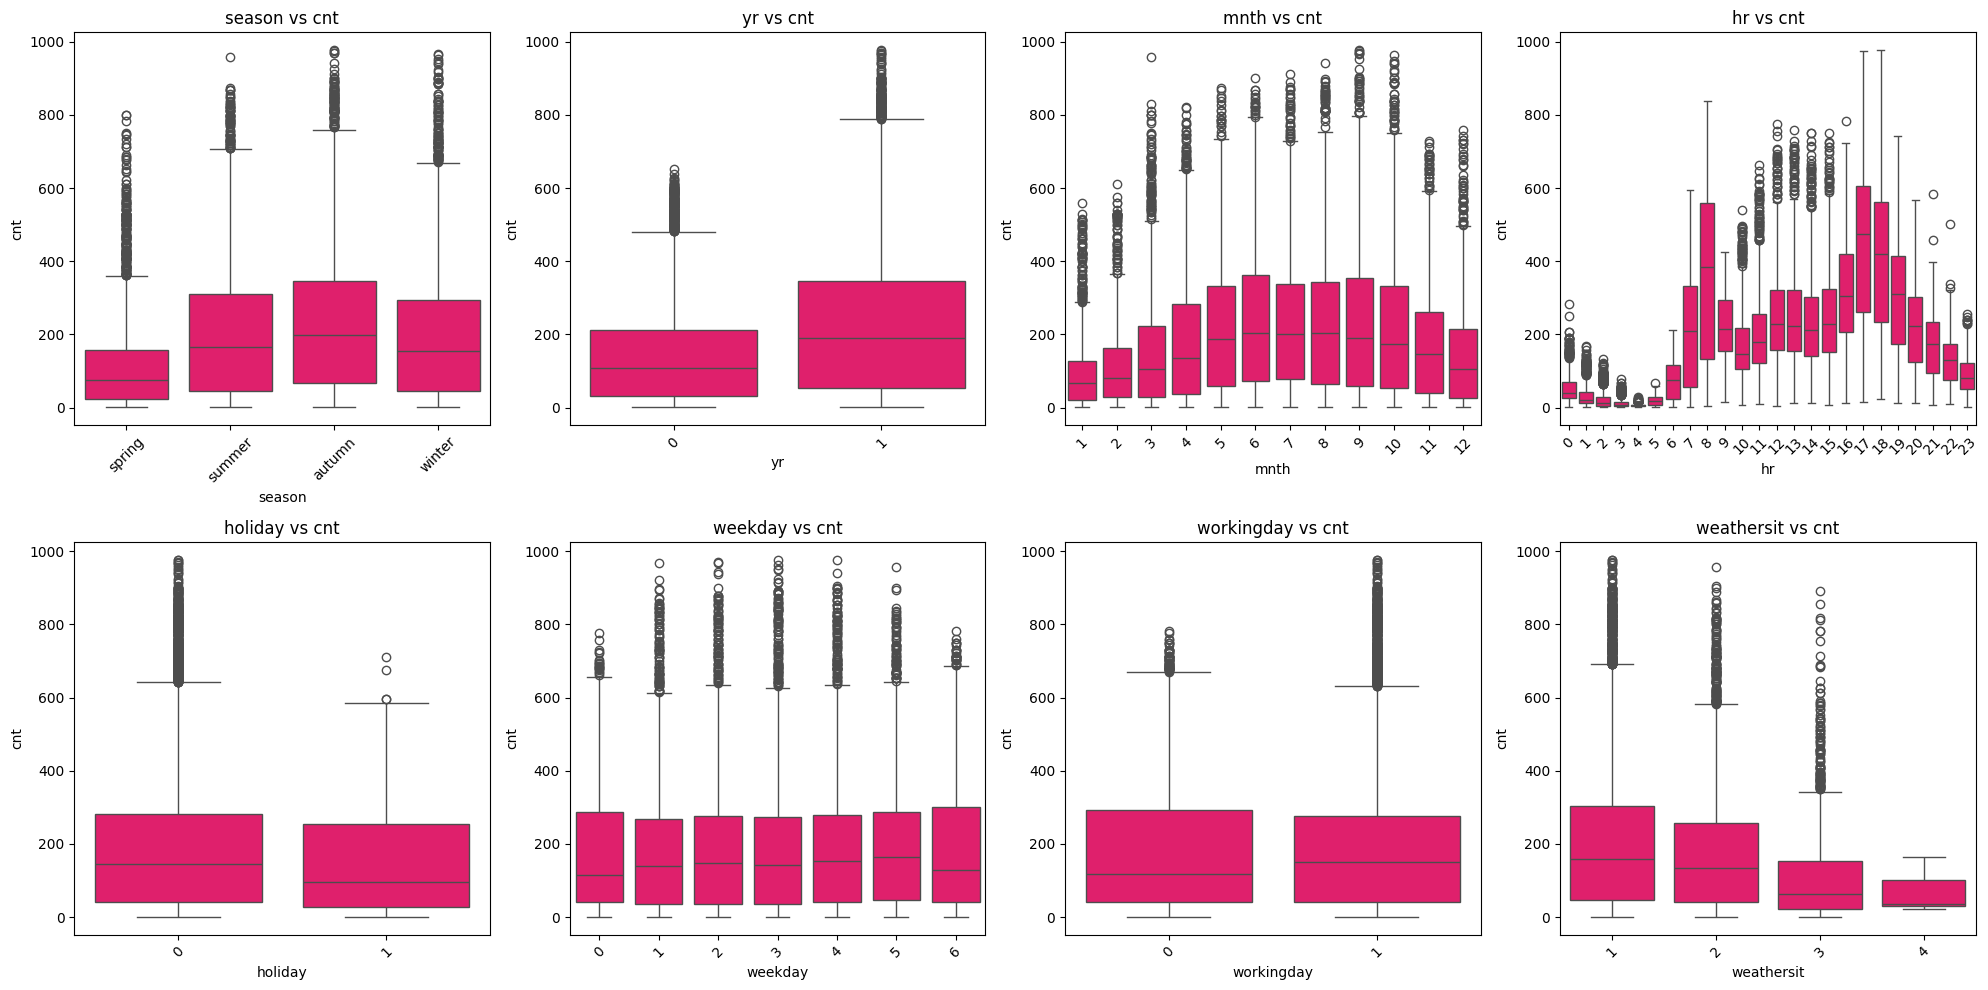

In [42]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.boxplot(x=var, y='cnt', data=data, ax=subplot, color='#FF0065')
    subplot.set_title(f'{var} vs cnt')
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

**Висновки з 11-12 завдання (детальні)**

1. Вибираючи числові змінні в окремий набір даних, ми можемо простіше знаходити взаємозв'язки між ними, аналізувати, як вони впливають на результати, та робити детальніший статистичний аналіз.  
2.  Графіки показують, як погода впливає на кількість викликів швидкої допомоги. Можна побачити, що коли температура вища, викликів більше, а висока вологість може зменшити їх кількість.
3. Графіки показують, як кількість викликів змінюється залежно від таких факторів, як сезон, рік, місяць, час дня, свята, дні тижня, будні дні та погода. Вони допомагають побачити, як різні умови впливають на кількість викликів, включаючи особливі випадки та порівняння середніх значень.

**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

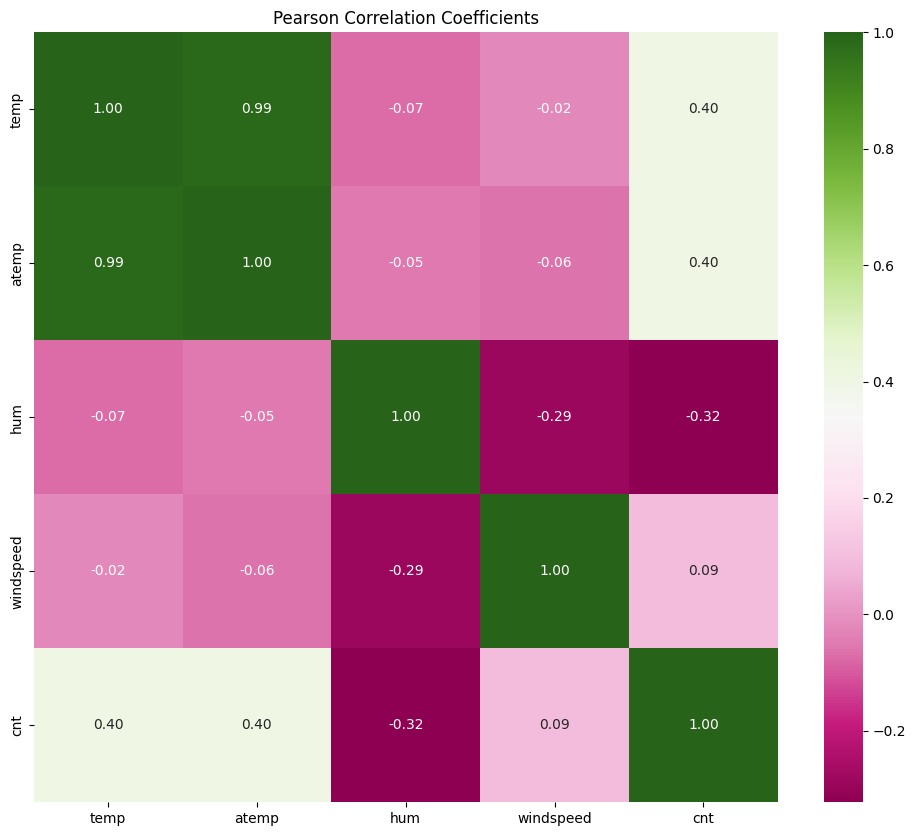

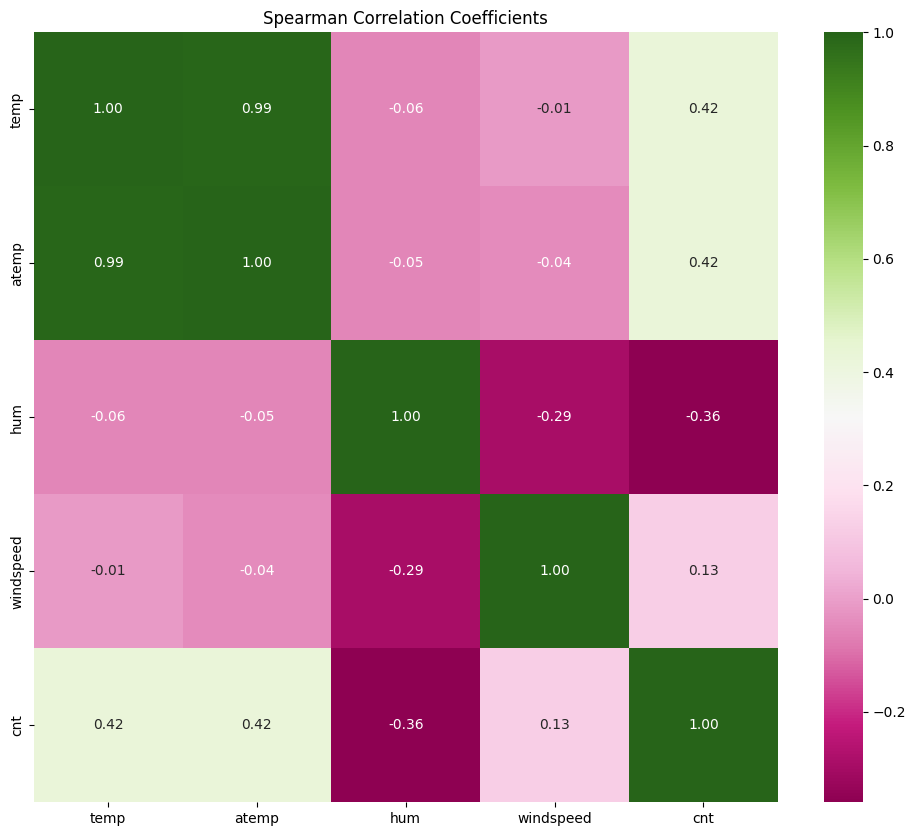

In [25]:
pearson = data_numerical.corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(pearson, annot=True, cmap="PiYG", fmt=".2f")
plt.title('Pearson Correlation Coefficients')
plt.show()

spearman = data_numerical.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(spearman, annot=True, cmap="PiYG", fmt=".2f")
plt.title('Spearman Correlation Coefficients')
plt.show()

На графіку залишків видно, що похибки збільшуються з ростом прогнозованих значень. Це вказує на те, що модель краще функціонує з меншими числами.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [26]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      pd.get_dummies(df['season']),
                      pd.get_dummies(df['mnth']),
                      pd.get_dummies(df['weekday']),
                      pd.get_dummies(df['weathersit']),
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features

In [27]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [28]:
features['night_hours'] = features['hr'].apply(lambda x: 1 if 22 <= x or x < 6 else 0)
features = features.drop('hr', axis=1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [29]:
features_lr = features.drop(['atemp', 'date'], axis = 1)

In [30]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(target, axis = 1)
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [31]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [32]:
def train_linear_model(X_train, y_train):
  X_train.columns = X_train.columns.astype(str)
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)


In [33]:
# predict
y_train_pred = model.predict(X_train)
X_test.columns = X_test.columns.astype(str)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 15877.966, test: 15224.769
R^2 train: 0.525, test: 0.518


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

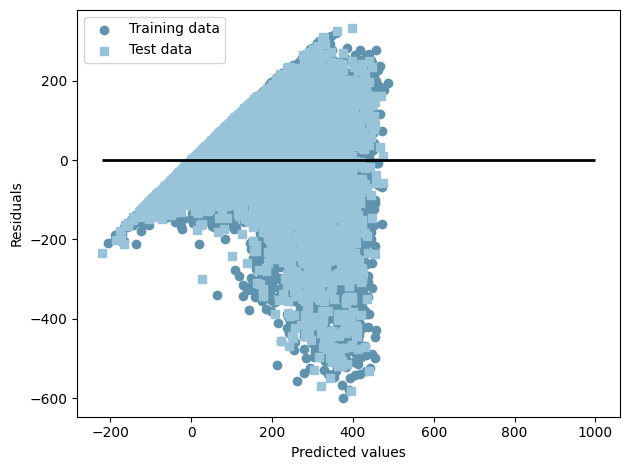

In [50]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**

1. Ця функція дозволяє перетворити текстові категорії у датафреймі на числа. Це полегшує аналіз даних комп'ютером, оскільки машини краще розуміють числові дані. Вона особливо корисна для обробки інформації про погоду, час і дати, оскільки дозволяє видаляти старі текстові колонки.
2. Модель відзначається помірною точністю з однаковими помилками у тренувальних і тестових даних, що показує її стабільність. Проте, коефіцієнт детермінації R^2 на рівні близько 0.52 для обох груп даних, що вказує на потенціал для покращень у моделі. 
3. Діаграма показує, що чим більше значення, які ми намагаємося передбачити, тим більші помилки робить модель. Це значить, що модель краще працює з маленькими числами і може недостатньо точно передбачати великі числа. Також є багато великих помилок, що вказує на те, що модель не завжди стабільно працює, особливо коли потрібно передбачати великі числа.